<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/Python/Quest03/Closure_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(회고)

앞의 퀘스트를 진행할땐, 챗GPT를 활용해도 이게 도대체 무슨 말인가 너무 힘들고 어려웠는데,
노드의 진행방식과 동일하게 빈칸채우기 형식으로 퀘스트를 진행하니
어렵긴해도 방향성을 잡을 수 있어서 좀 더 문제를 풀어낼 수 있다는 자신감이 생겼다.
클로저함수는 자신을 둘러싼 스코프의 상태값을 '기억'하는 함수라고 했다.
어떤 함수의 내부 함수일것, 그 내부함수가 외부함수의 변수를 참조할것, 외부함수가 내부함수를 리턴할 것의 3가지 조건을 충족해야 한다고 했는데 어제 노드공부하면서도 알듯말듯 이게 도대체 무슨 말이지 싶었는데
문제를 풀면서 조금 더 이해하게 된 것 같다.
아쉬운 점은 같은 팀원에게 좀 더 도움이 되고 싶었는데 문제만 보면 눈앞이 깜깜해져서 바로 솔루션을 생각해내지못하고 챗GPT의 도움이 절실했다는 것이다.
앞으로의 과정에도 충실히 참여하여 딱뽝! 하고 코드를 구현할 수 있으면 좋겠다고 느꼈다.

# [파이썬] 퀘스트: 클로저를 활용한 문제해결하기

난이도: ★★★★☆  
장르: nonlocal, 클로저, 데코레이터 활용  

---




## 문제 1. 최댓값과 최솟값 찾기



조건:  
* 주어진 리스트의 최댓값과 최솟값을 반환하는 클로저 함수를 완성해 주세요.
    * 주어진 숫자 리스트 numbers에 대해 find_min_max 함수를 호출하면 find_min과 find_max 함수를 얻을 수 있습니다.
    * find_min() 함수를 호출하면 최솟값을, find_max()함수를 호출하면 최댓값을 반환합니다.
    * 클로저를 사용하여 min_value와 max_value 변수를 외부에 노출하지 않고도 최솟값과 최대값을 찾을 수 있습니다.
    * find_min_max 함수가 호출된 이후에도 find_min과 find_max 함수를 통해 min_value와 max_value 변수에 접근할 수 있습니다.
* 주석으로 구현 내용이 써있는 부분을 코드로 채워주세요.
---
입력:
```python
numbers = [10, 5, 8, 12, 3, 7]
find_min, find_max = find_min_max(numbers)

print("최솟값:", find_min())  
print("최댓값:", find_max())  
```
---
출력:
```
3
12
```


In [18]:
def find_min_max(numbers):
    # 주어진 리스트의 최솟값과 최댓값을 계산
    min_value = min(numbers)
    max_value = max(numbers)

    def find_min():
        # 최솟값 반환
        return min_value

    def find_max():
        # 최댓값 반환
        return max_value

    # find_min과 find_max 함수 반환
    return find_min, find_max

# 테스트
numbers = [10, 5, 8, 12, 3, 7]
find_min, find_max = find_min_max(numbers)

print("최솟값:", find_min())  # 최솟값: 3
print("최댓값:", find_max())  # 최댓값: 12
print(find_min_max(numbers))

최솟값: 3
최댓값: 12
(<function find_min_max.<locals>.find_min at 0x7e1fdb311510>, <function find_min_max.<locals>.find_max at 0x7e1fdb312560>)


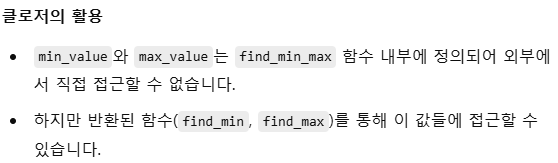

In [3]:
def find_min_max(numbers): #numbers리스트를 입력받아 최솟값과 최댓값을 저장하는 상자 준비
    # min_value와 max_value 변수를 초기화
    # min_value는 양의 무한대(float('inf'))로 초기화하여 어떤 숫자보다도 큰 값으로 설정
    min_value = float('inf')   #최소값 상자
    # max_value는 음의 무한대(float('-inf'))로 초기화하여 어떤 숫자보다도 작은 값으로 설정
    max_value = float('-inf')  #최대값 상자

    def update_min_max(num):
        # 외부함수의 변수인 min_value, max_value 참조
        # 외부함수의 변수를 가지고 들어옴.
        nonlocal min_value, max_value  #안에 있는 함수에서 바깥 함수의 변수를 수정할때 nonlocal을 사용

        # 만약 num 값이 min_value보다 작다면 min_value를 num 값으로 변경
        if num < min_value:   #만약 숫자가 더 작으면
           min_value = num    #작은값 상자에 넣기.

        # 만약 num 값이 max_value보다 크다면 max_value를 num 값으로 변경
        if num  > max_value:   #만약 숫자가 더 크면
            max_value = num    #큰 값 상자에 넣기.


    # numbers 리스트의 모든 값을 순환하며 최댓값과 최솟값 업데이트
    for num in numbers:     #numbers안의 숫자를 하나씩 살펴보면서 최솟값, 최대값 찾기
        update_min_max(num)

    #최솟값과 최댓값을 알려주는 함수 만들기.
    # 최솟값을 반환하는 내부함수
    def get_min():

        return min_value


    # 최댓값을 반환하는 내부함수
    def get_max():
        return max_value


    # 외부함수는 내부함수(get_min()과 get_max())를 반환
    #두 함수를 돌려줘서 나중에 쓸수 있게 해줌.
    return get_min, get_max


In [13]:
numbers = [10, 5, 8, 12, 3, 7]
get_min, get_max = find_min_max(numbers)  #도구를 가져와요!

print("최솟값:", get_min())  # 작은 값 상자에 들어있는 숫자 -> 3
print("최댓값:", get_max())  # 큰 값 상자에 들어있는 숫자 -> 12

최솟값: 3
최댓값: 12


In [14]:
numbers = [10, 5, 8, 12, 3, 7]
find_min, find_max = find_min_max(numbers)  #함수 이름이라서 아무거나 사용가능!

print("최솟값:", find_min())
print("최댓값:", find_max())

최솟값: 3
최댓값: 12


In [16]:
numbers = [10, 5, 8, 12, 3, 7]
apple, banana = find_min_max(numbers)  #함수 이름이라서 아무거나 사용가능!

print("최솟값:", apple())
print("최댓값:", banana())

최솟값: 3
최댓값: 12


## 문제 2. 함수의 호출 횟수를 세는 데코레이터

지난 시간에 배운 데코레이터를 기억하시나요? 데코레이터도 내부함수를 반환하는 클로저를 활용한 문법입니다. 클로저를 활용하여 함수 호출 횟수를 출력하는 데코레이터를 만들어봅시다.

조건:
* 함수가 실행될 때 마다 함수 이름과 실행 횟수를 출력하는 데코레이터 `counter` 만들기  

힌트:
* 데코레이터의 내부 함수(클로저)는 실행횟수를 기억하기 위해 외부 함수의 변수를 참조 해야 합니다
* 함수의 이름은 `함수이름.__name__`으로 접근할 수 있습니다.

---
입력:
```python
@counter
def say_hello():
    print("Hello Aiffel!")

for i in range(5):
    say_hello()
```
---
출력:
```
Hello Aiffel!
say_hello 실행횟수: 1
Hello Aiffel!
say_hello 실행횟수: 2
Hello Aiffel!
say_hello 실행횟수: 3
Hello Aiffel!
say_hello 실행횟수: 4
Hello Aiffel!
say_hello 실행횟수: 5
```

In [10]:
#호출 횟수를 저장하는 변수
# 어떤 함수를 몇 번 불럿는지 자동으로 숫자를 세는도구(데코레이터) 만들기!
def counter(func):
    count = 0  #함수 몇번 불렀는지 세는 숫자

    def wrapper():
        nonlocal count #외부함수의 count 변수를 참조 #바깥에 있는 count를 쓰기.
        count += 1  #함수를 부를때마다 숫자 1씩 더하기.
        print(f"'{func.__name__}' 실행횟수: {count}")  #함수의 이름은 함수이름.__name__으로 쓰기, #몇번인지 카운트 출력하기
        func() #함수 부르기.

    return wrapper  #새로만든 함수(wrapper)를 돌려줌.

@counter  #데코레이터를 나타낼때 앞에 '@'를 붙인다.
def say_hello():
    print("Hello Aiffel!")

for _ in range(5):
    say_hello()

'say_hello' 실행횟수: 1
Hello Aiffel!
'say_hello' 실행횟수: 2
Hello Aiffel!
'say_hello' 실행횟수: 3
Hello Aiffel!
'say_hello' 실행횟수: 4
Hello Aiffel!
'say_hello' 실행횟수: 5
Hello Aiffel!


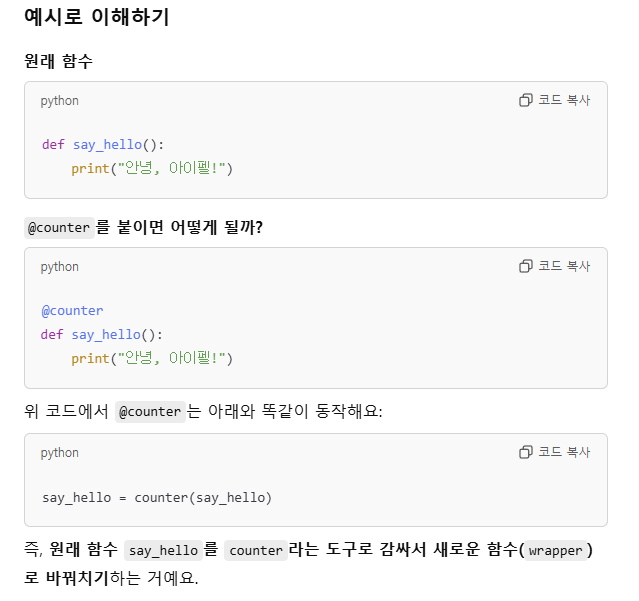